In [6]:
# Kaggle- House Sales in King County, USA

# Load the dataset
dataset = read.csv('kc_house_data.csv')

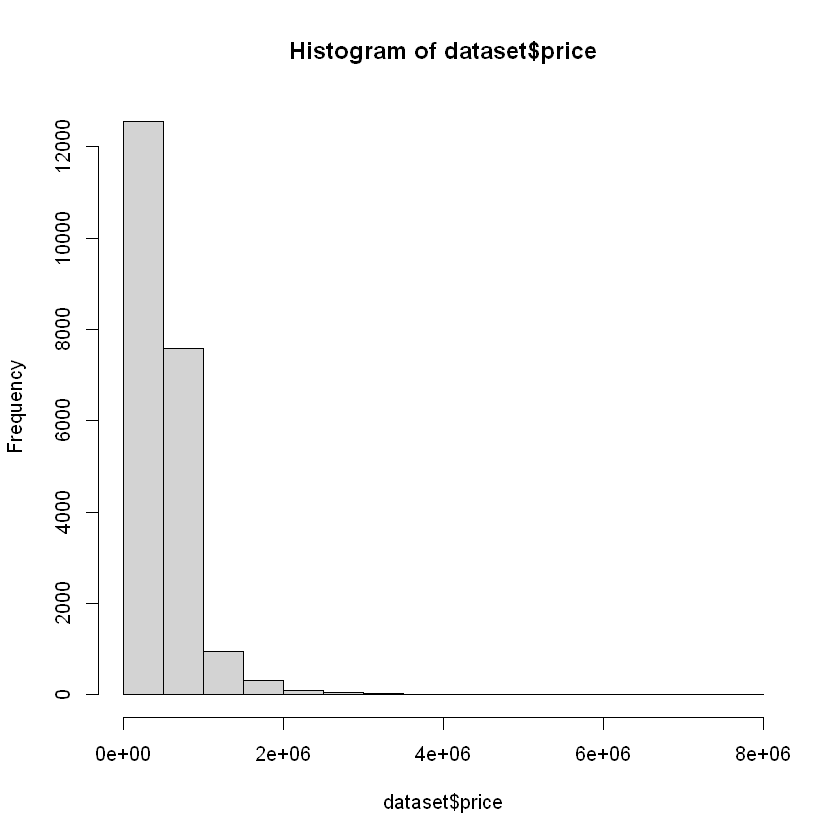

In [7]:
# Lets see the distribution of price.
hist(dataset$price)

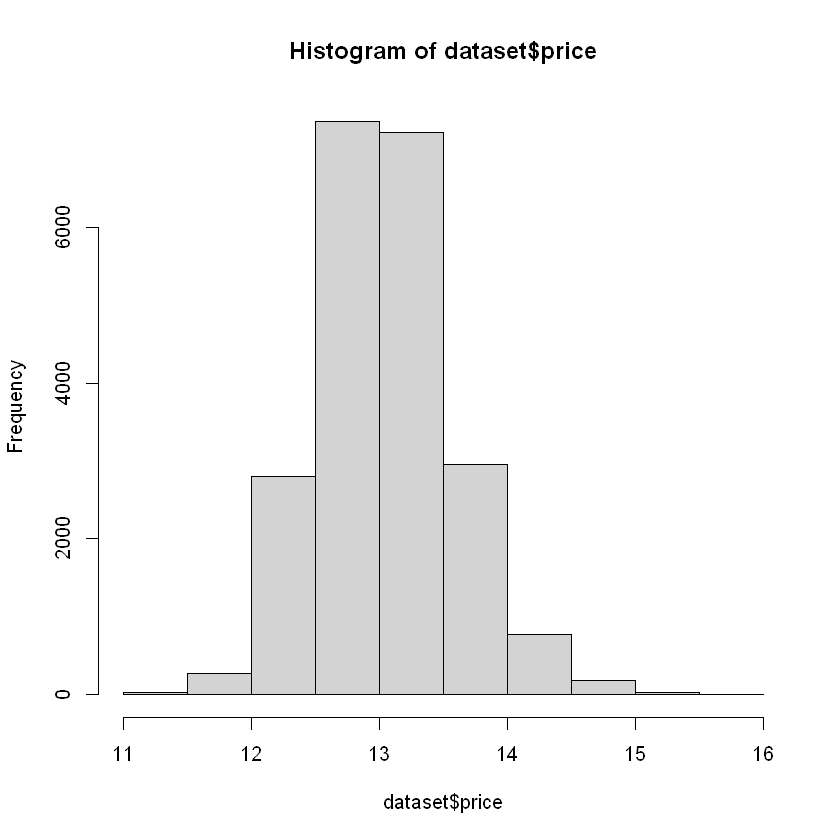

In [8]:
# It is skewed. Lets make it uniform.
dataset$price = log(dataset$price)

# Lets see the distribution of price.
hist(dataset$price)

In [57]:
# install.packages('pacman')
# library(pacman)
# pacman:: p_load(Metrics, car, corrplot, caTools, ggplot2, DAAG)

In [10]:
# Visualize the dataset
head(dataset)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,12.30998,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,13.19561,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,12.10071,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,13.31133,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,13.14217,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,14.01845,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [11]:
# Changing date to yyyymm format
dataset$date = substr(dataset$date, 1, 6)
# Converting it to numeric as we can only use numeric values for corrleation
dataset$date = as.numeric(as.character(dataset$date))
# Visualize the data again
head(dataset)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,201410,12.30998,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,201412,13.19561,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,201502,12.10071,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,201412,13.31133,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,201502,13.14217,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,201405,14.01845,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [12]:
# Check for NA and missing values
# is.na return a vector with value T for missing values.
numberOfNA = length(which(is.na(dataset) == T))
if(numberOfNA > 0)
{
  cat('Number of missing values: ', numberOfNA)
  cat('\nRemoving missing values...')
  dataset = dataset[complete.cases(dataset), ]
}

In [13]:
# Removing columns id as we do not need it
dataset$id = NULL

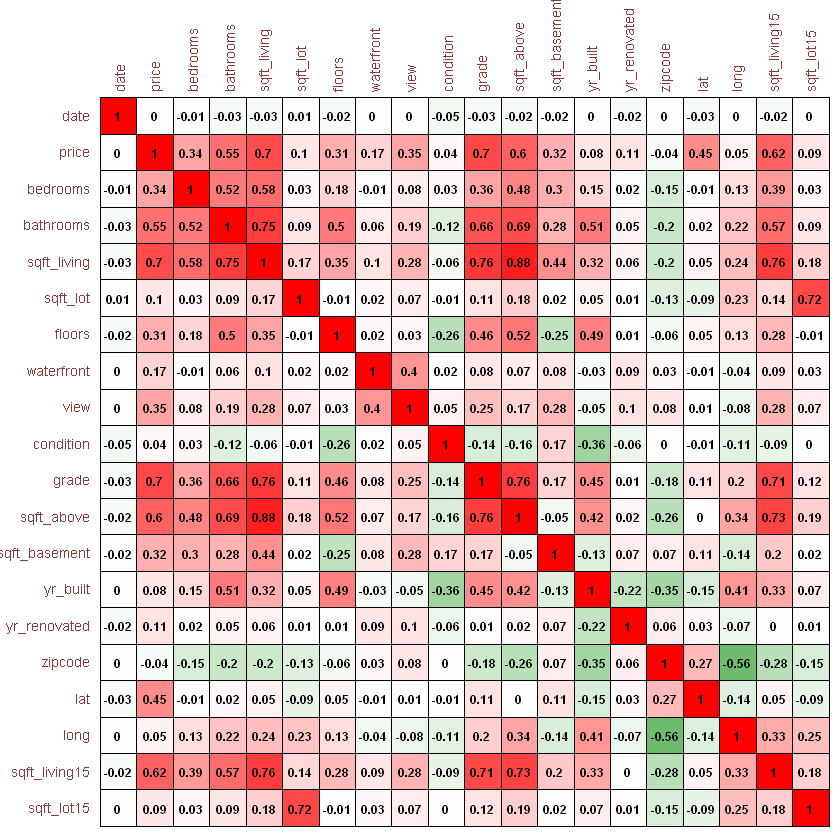

In [14]:
# Checking correltaion of price with other variables
corr = cor(dataset[, 1:20])
corrplot(corr, method = "color", outline = T, cl.pos = 'n', rect.col = "black",  tl.col = "indianred4", addCoef.col = "black", number.digits = 2, number.cex = 0.60, tl.cex = 0.7, cl.cex = 1, col = colorRampPalette(c("green4","white","red"))(100))

In [15]:
# Finding correlation
# Correlation is a statistical measure that suggests the level of linear dependence between two variables
# that occur in pair. 
# Its value is between -1 to +1
# Above 0 is positive correlation i.e. X is directly proportional to Y.
# Below 0 is negative correlation i.e. X is inversly proportional to Y.
# Value close to 0 suggests weak relation.

# Picking up some of the features that are highly correlated with price
# Correlation between price and sqft_living is (0.7)
# Correlation between price and grade is (0.67)
# Correlation between price and sqft_above is (0.61)
# Correlation between price and sqft_living15 is (0.59)
# Correlation between price and bathrooms is (0.53)

# Now, let us evaluate the correlation of the below features with each others for multicolinearity.
# We would do this later by calculating VIF
# Correlation between sqft_living and sqft_above is (0.88)
# Correlation between sqft_living and sqft_living15 is (0.76)
# Correlation between sqft_living and grade is (0.76)
# Correlation between sqft living and bathrooms is (0.75)
# We would keep grade as of now as it is a category.

# Following have weak relation with price and we would remove them.
# date, sqft_lot, yr_built, long, sqft_lot15
# We would delete lat as well even though it has correlation of 0.31
# because, 0.31 is not that significant. It is a category.
# If we would convert it to factor, there would be way too many levels 
# and would make computation very expensive.

# Another reason to remove variable is to avoid overfitting.

In [16]:
# Removing columns
dataset$date = NULL
dataset$sqft_lot = NULL
dataset$sqft_lot15 = NULL
dataset$yr_built = NULL
dataset$lat = NULL
dataset$long = NULL
head(dataset)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15
,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,12.30998,3,1.00,1180,1,0,0,3,7,1180,0,0,98178,1340
2,13.19561,3,2.25,2570,2,0,0,3,7,2170,400,1991,98125,1690
3,12.10071,2,1.00,770,1,0,0,3,6,770,0,0,98028,2720
4,13.31133,4,3.00,1960,1,0,0,5,7,1050,910,0,98136,1360
5,13.14217,3,2.00,1680,1,0,0,3,8,1680,0,0,98074,1800
6,14.01845,4,4.50,5420,1,0,0,3,11,3890,1530,0,98053,4760


In [17]:
# Check for Multicollinearity 
# Multicollinearity occurs when your model includes multiple factors 
# that are correlated not just to your response variable, but also to each other.
# Multicollinearity increases the standard errors of the coefficients. 
# Increased standard errors in turn means that coefficients for some independent variables 
# may be found not to be significantly different from 0. 

# So, how do you know if you need to be concerned about multicollinearity in your regression model? 
# Here are some things to watch for:
    # A regression coefficient is not significant even though, 
        # theoretically, that variable should be highly correlated with Y.
    # When you add or delete an X variable, the regression coefficients change dramatically.
    # You see a negative regression coefficient when your response should increase along with X.
    # You see a positive regression coefficient when the response should decrease as X increases.
    # Your X variables have high pairwise correlations. 

# Remove highly correlated predictors from the model.
# If you have two or more factors, remove one from the model. 
# Because they supply redundant information, 
# removing one of the correlated factors usually doesn't drastically reduce the R-squared.  
# Select the model that has the highest R-squared value. 

# In statistics, the variance inflation factor (VIF) quantifies the severity of multicollinearity
# in an ordinary least squares regression analysis. 
# It provides an index that measures how much the variance 
# of an estimated regression coefficient is increased because of collinearity.

# If the variance inflation factor of a predictor variable is 4 
# this means that variance for the coefficient of that predictor variable is 4 times
# as large as it would be if that predictor variable were uncorrelated with the other predictor variables.

# VIFs start at 1 and have no upper limit. 
# A value of 1 indicates that there is no correlation between this independent variable and any others.
# VIFs between 1 and 4 suggest that there is a moderate correlation, 
# but it is not severe enough to warrant corrective measures. 
# VIFs greater than 4 represent critical 
# levels of multicollinearity where the coefficients are poorly estimated, 
# and the p-values are questionable.

In [18]:
# Check VIF for sqft_living and sqft_above. Their correlation was 0.88
model = lm(formula = price ~ sqft_living + sqft_above,
               data = dataset)
summary(model)
vif(model)


Call:
lm(formula = price ~ sqft_living + sqft_above, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.00830 -0.28527  0.01499  0.25972  1.28656 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.222e+01  6.441e-03 1897.547  < 2e-16 ***
sqft_living  4.155e-04  5.824e-06   71.343  < 2e-16 ***
sqft_above  -2.123e-05  6.460e-06   -3.287  0.00101 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3784 on 21610 degrees of freedom
Multiple R-squared:  0.4838,	Adjusted R-squared:  0.4837 
F-statistic: 1.013e+04 on 2 and 21610 DF,  p-value: < 2.2e-16


sqft_living  sqft_above 
     4.3182      4.3182

In [19]:
# vif is close to 4 and correlation of sqft_living with price is better. So we would remove sqft_above.
dataset$sqft_above = NULL

In [20]:
# Create model with sqft_living and bathrooms. Their correlation was 0.75
model = lm(formula = price ~ sqft_living + bathrooms,
               data = dataset)
summary(model)
vif(model)


Call:
lm(formula = price ~ sqft_living + bathrooms, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.92123 -0.28674  0.01361  0.25734  1.29478 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 1.219e+01  7.551e-03 1613.797  < 2e-16 ***
sqft_living 3.726e-04  4.266e-06   87.322  < 2e-16 ***
bathrooms   4.139e-02  5.088e-03    8.134 4.36e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.378 on 21610 degrees of freedom
Multiple R-squared:  0.4851,	Adjusted R-squared:  0.485 
F-statistic: 1.018e+04 on 2 and 21610 DF,  p-value: < 2.2e-16


sqft_living   bathrooms 
      2.323       2.323

In [21]:
# VIF is less than 4, we would keep both the features.

In [22]:
# Create model with sqft_living and sqft_living15. Their correlation is 0.76
model = lm(formula = price ~ sqft_living + sqft_living15,
               data = dataset)
summary(model)
vif(model)


Call:
lm(formula = price ~ sqft_living + sqft_living15, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3733 -0.2823  0.0077  0.2601  1.3379 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.208e+01  7.743e-03 1560.49   <2e-16 ***
sqft_living   3.041e-04  4.201e-06   72.39   <2e-16 ***
sqft_living15 1.677e-04  5.629e-06   29.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.371 on 21610 degrees of freedom
Multiple R-squared:  0.5039,	Adjusted R-squared:  0.5038 
F-statistic: 1.097e+04 on 2 and 21610 DF,  p-value: < 2.2e-16


sqft_living sqft_living15 
       2.3374        2.3374

In [23]:
# VIF is less than 4, we would keep both the features.

In [24]:
# Create model with sqft_living and grade Their correlation is 0.76
model = lm(formula = price ~ sqft_living + grade,
               data = dataset)
summary(model)
vif(model)


Call:
lm(formula = price ~ sqft_living + grade, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.70741 -0.25607  0.00049  0.23536  1.42320 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.117e+01  1.865e-02  599.26   <2e-16 ***
sqft_living 2.175e-04  4.022e-06   54.08   <2e-16 ***
grade       1.856e-01  3.143e-03   59.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3512 on 21610 degrees of freedom
Multiple R-squared:  0.5553,	Adjusted R-squared:  0.5553 
F-statistic: 1.349e+04 on 2 and 21610 DF,  p-value: < 2.2e-16


sqft_living       grade 
     2.3907      2.3907

In [25]:
# VIF is less than 4, we would keep both the features.

In [27]:
# Bedrooms does not have linear relationship with price.
# So, I would convert this into factor.
# For 11 and 33, there are hardly any houses.
# Checking the other data for these 2 houses
print(subset(dataset, dataset$bedrooms > 10))

         price bedrooms bathrooms sqft_living floors waterfront view condition
8758  13.16158       11      3.00        3000      2          0    0         3
15871 13.36922       33      1.75        1620      1          0    0         5
      grade sqft_basement yr_renovated zipcode sqft_living15
8758      7           600         1999   98106          1420
15871     7           580            0   98103          1330


In [28]:
# A house of 33 bedrooms with very los sqft_living and only 1.75 bathrooms. 
# This makes no sense and may lead to errors.
# There is only one house with 11 bedroom. We would delete this as 
# if later this becomes part of test data, we would get an error since it is never trained.
# We would remove this 
dataset = dataset[dataset$bedrooms <= 10, ]

# Converting bedrooms into factors
dataset$bedrooms = as.factor(dataset$bedrooms)

In [30]:
# Price and bathrooms show a linear relation

In [33]:
# There exists a linear relation.

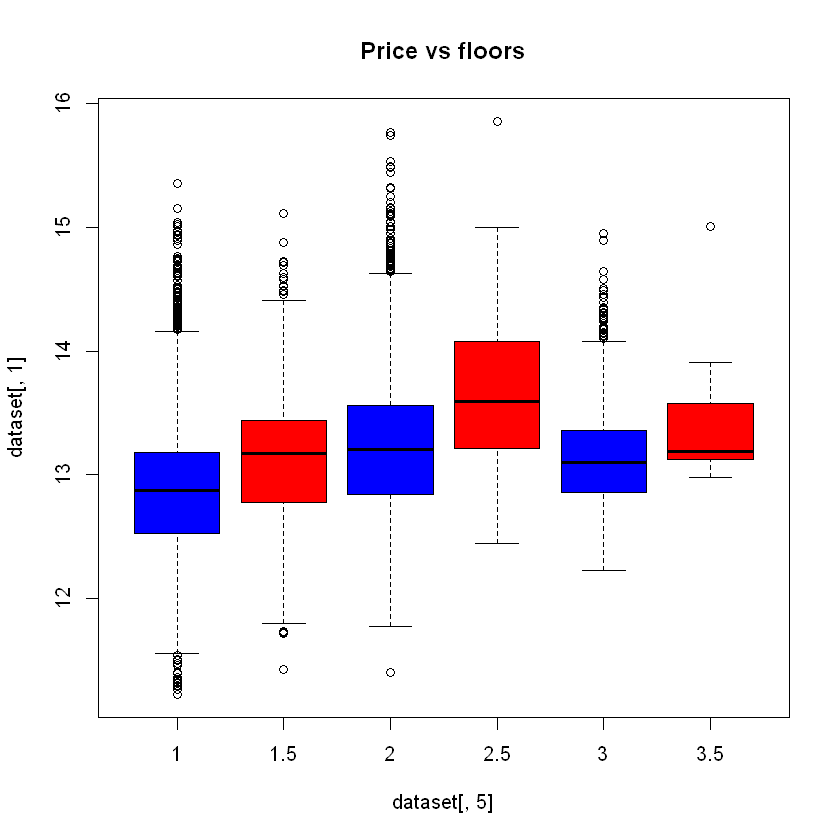

In [34]:
# Boxplot between price and floors
boxplot(dataset[, 1] ~ dataset[, 5], main = 'Price vs floors', col=c("blue","red"))
# Floors are clearly a categorical. 
# Converting it into factor
dataset$floors = as.factor(dataset$floors)

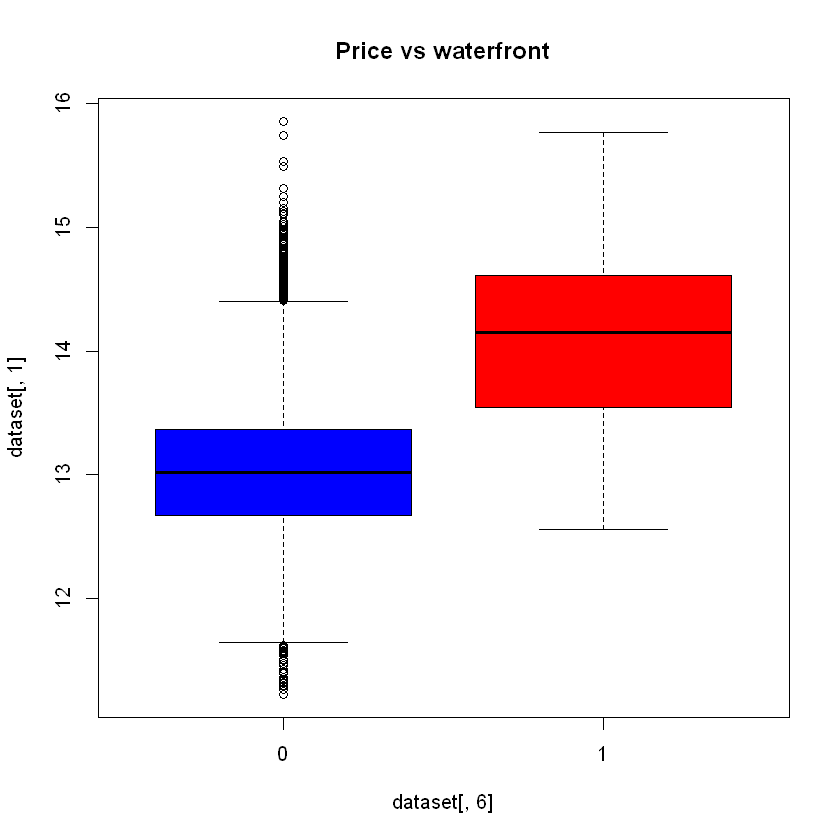

In [35]:
# Boxplot between price and waterfront
boxplot(dataset[, 1] ~ dataset[, 6], main = 'Price vs waterfront', col=c("blue","red"))
# Waterfront are clearly a categorical value. 
# Converting it into factor
dataset$waterfront = as.factor(dataset$waterfront)

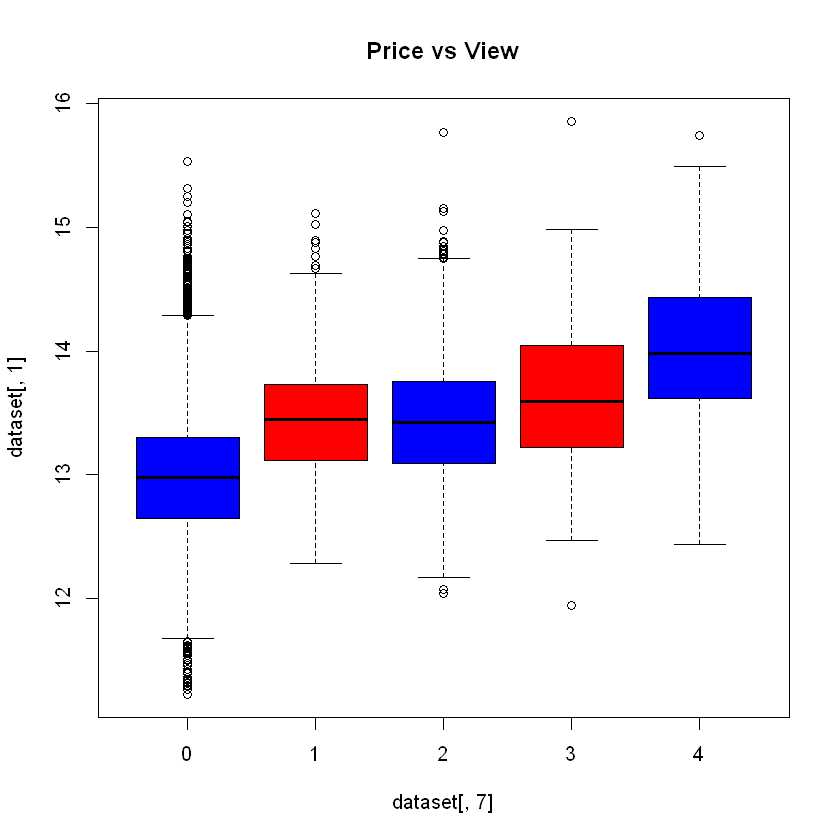

In [36]:
# Boxplot between price and view
boxplot(dataset[, 1] ~ dataset[, 7], main = 'Price vs View', col=c("blue","red"))
# View are clearly a categorical value. 
# Converting it into factor
dataset$view = as.factor(dataset$view)

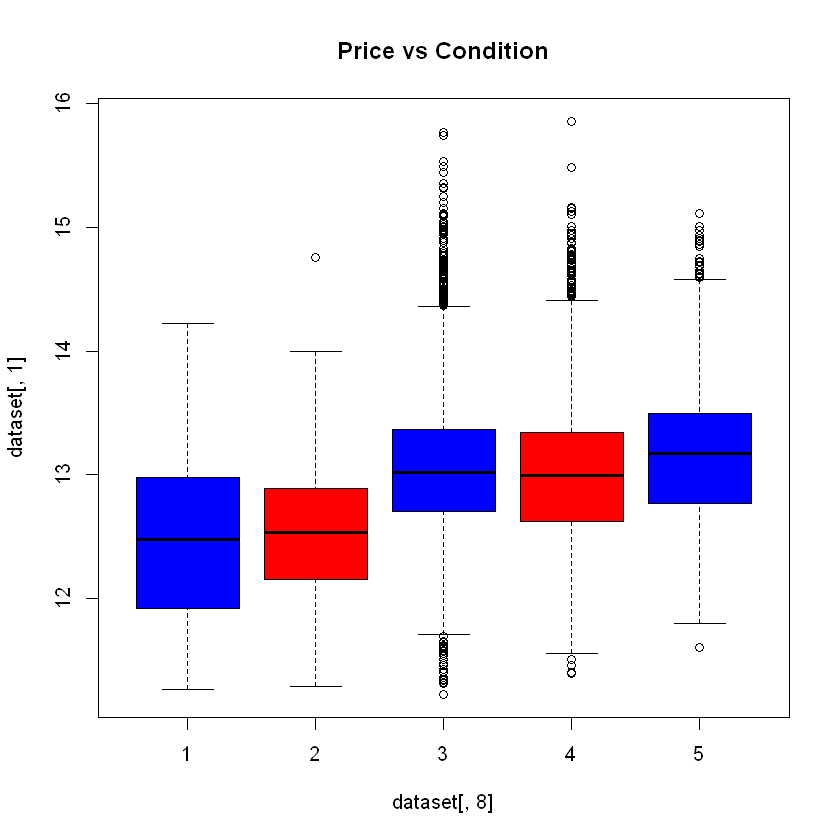

In [37]:
# Boxplot between price and condition
boxplot(dataset[, 1] ~ dataset[, 8], main = 'Price vs Condition', col=c("blue","red"))
# Condition are clearly a categorical value. 
# Converting it into factor
dataset$condition = as.factor(dataset$condition)

In [41]:
# It looks like most of the houses do not have basement. Lets check
length(dataset$sqft_basement[dataset$sqft_basement == 0])
# 13126 houses do not have basement. 
# I would divide this into 0 and 1
# 0 who do not have basement and 1 who have.
dataset$sqft_basement[dataset$sqft_basement != 0] = 1
# Create factor
dataset$sqft_basement = as.factor(dataset$sqft_basement)

[1] 13126

[1] 20698

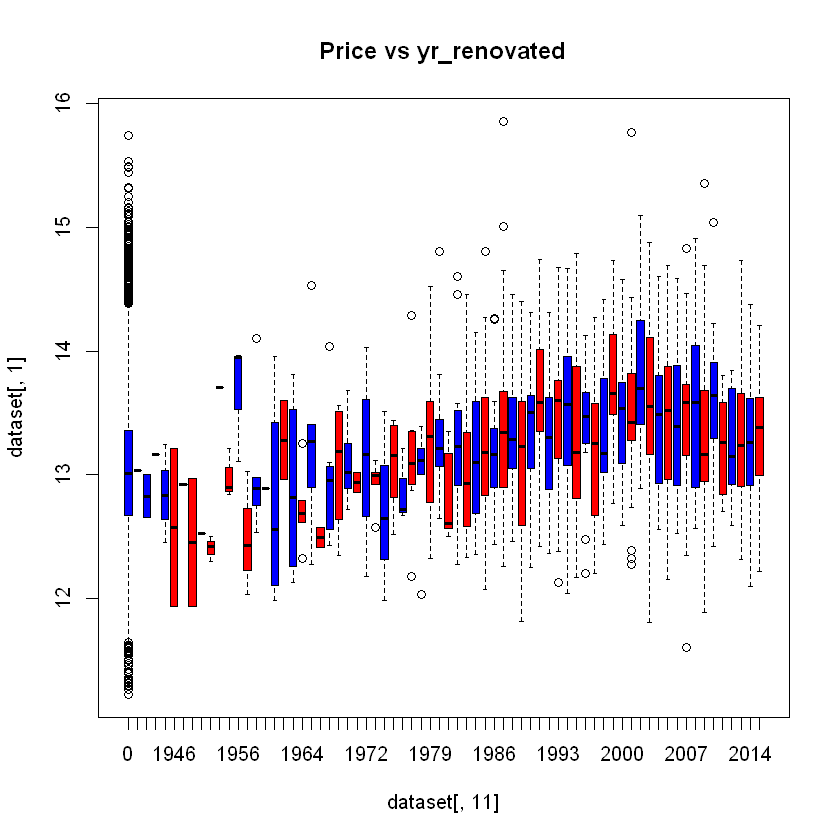

In [42]:
# Boxplot between price and yr_renovated
boxplot(dataset[, 1] ~ dataset[, 11], main = 'Price vs yr_renovated', col=c("blue","red"))
# Its same as sqft_basement
# There is no linear relationship.
# It looks like most of the houses have never been renovated. Lets check
length(dataset$yr_renovated[dataset$yr_renovated == 0])
# 20698 houses do not have basement. 
# I would divide this into 0 and 1
# 0 who do not have basement and 1 who have.
dataset$yr_renovated[dataset$yr_renovated != 0] = 1
# Create factor
dataset$yr_renovated = as.factor(dataset$yr_renovated)

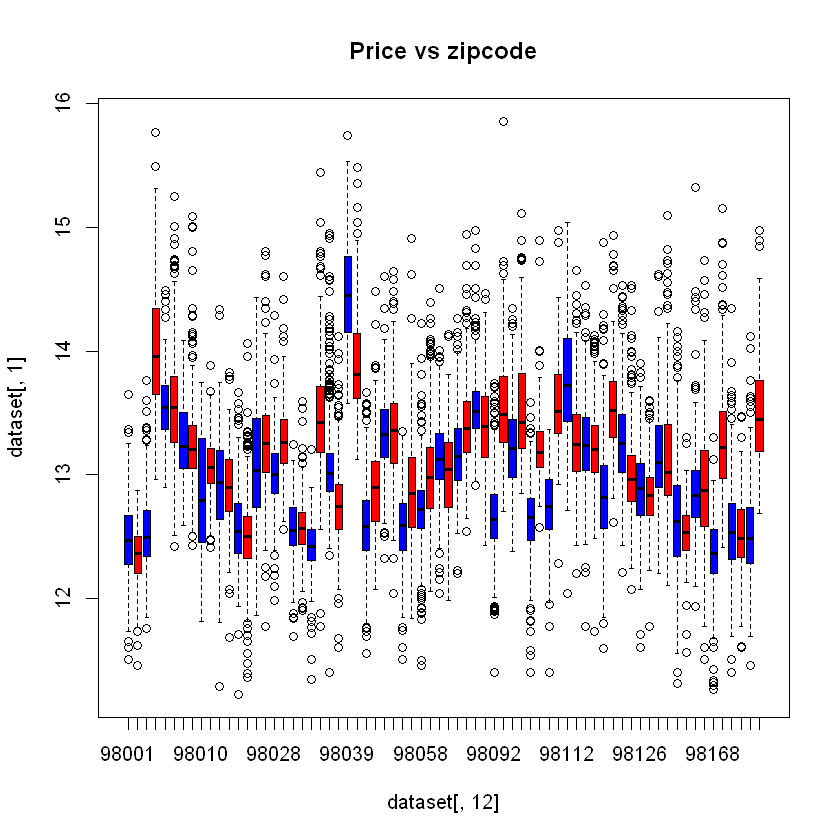

In [43]:
# Boxplot between price and zipcode
boxplot(dataset[, 1] ~ dataset[, 12], main = 'Price vs zipcode', col=c("blue","red"))
# Condition are clearly a categorical value. 
# Converting it into factor
dataset$zipcode = as.factor(dataset$zipcode)

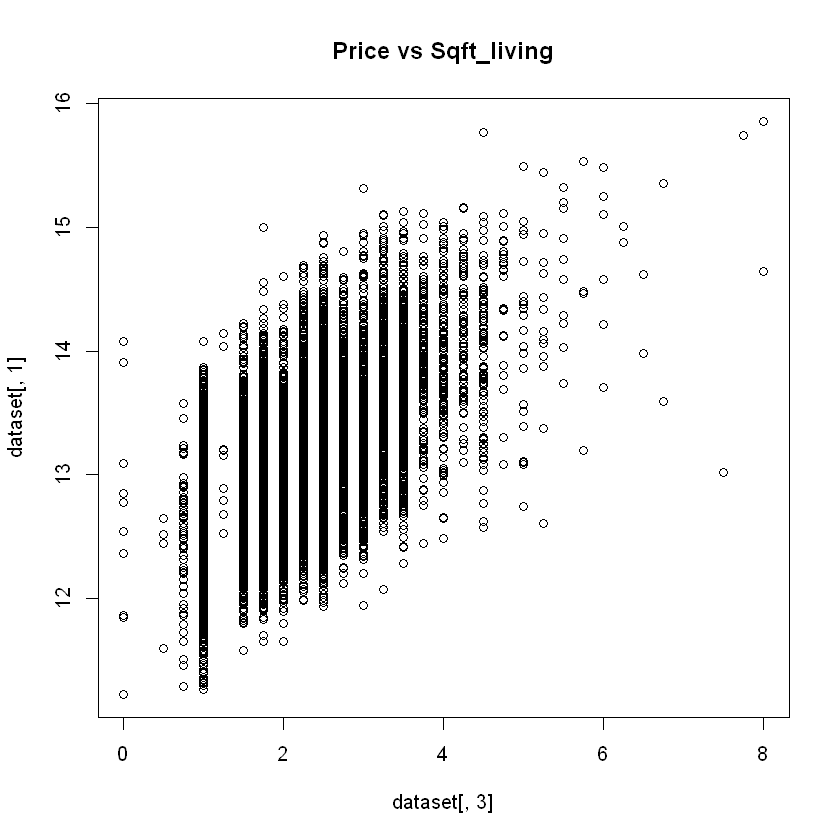

In [46]:
# Plot for Price
plot(dataset[, 3], dataset[, 1], main = 'Price vs Sqft_living')

In [47]:
# In left bottom corner, there seems to be a erroneous entry.
# For such a large house price is too small.
# We would remove this.
dataset = dataset[dataset$sqft_living != 13540, ]

In [48]:
head(dataset)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,sqft_living15
,<dbl>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>
1,12.30998,3,1.00,1180,1,0,0,3,7,0,0,98178,1340
2,13.19561,3,2.25,2570,2,0,0,3,7,1,1,98125,1690
3,12.10071,2,1.00,770,1,0,0,3,6,0,0,98028,2720
4,13.31133,4,3.00,1960,1,0,0,5,7,1,0,98136,1360
5,13.14217,3,2.00,1680,1,0,0,3,8,0,0,98074,1800
6,14.01845,4,4.50,5420,1,0,0,3,11,1,0,98053,4760


In [49]:
# Feature scaling
numericFeatures = sapply(dataset[, -1], is.numeric)
numericFeatures = c(FALSE, numericFeatures) # No need to scale price
dataset[numericFeatures] = sapply(dataset[numericFeatures], scale)

In [59]:
# Splitting dataset into training set and test set
set.seed(123) # Seed initializes the randomness
sample = sample.split(dataset, SplitRatio = 0.7) # Returns a vector with T for 70% of data
home = subset(dataset, sample == T)
testSet = subset(dataset, sample == F)

In [60]:
# Create model 
model = lm(formula = price ~  bedrooms + bathrooms + floors + waterfront + view + condition +
             + sqft_basement + yr_renovated + zipcode + sqft_living15 + sqft_living + grade,
           data = home)
summary(model)


Call:
lm(formula = price ~ bedrooms + bathrooms + floors + waterfront + 
    view + condition + +sqft_basement + yr_renovated + zipcode + 
    sqft_living15 + sqft_living + grade, data = home)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27381 -0.10016  0.00486  0.10414  1.09592 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    12.284462   0.075642 162.403  < 2e-16 ***
bedrooms1       0.015099   0.064462   0.234 0.814809    
bedrooms2       0.023560   0.062649   0.376 0.706878    
bedrooms3       0.053005   0.062575   0.847 0.396970    
bedrooms4       0.058971   0.062632   0.942 0.346438    
bedrooms5       0.013905   0.062911   0.221 0.825082    
bedrooms6      -0.020775   0.064233  -0.323 0.746374    
bedrooms7      -0.098554   0.074504  -1.323 0.185922    
bedrooms8      -0.069232   0.086767  -0.798 0.424940    
bedrooms9      -0.144930   0.105266  -1.377 0.168596    
bedrooms10     -0.207210   0.124614  -1.663 0.096372 .  
bat

In [63]:
# Bedrooms are not statisticaaly significant, so we would omit it.
model = lm(formula = price ~  bathrooms + floors + waterfront + view + condition +
             + sqft_basement + yr_renovated + zipcode+ sqft_living15 + sqft_living + grade,
           data = home)
summary(model)


Call:
lm(formula = price ~ bathrooms + floors + waterfront + view + 
    condition + +sqft_basement + yr_renovated + zipcode + sqft_living15 + 
    sqft_living + grade, data = home)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27847 -0.10017  0.00587  0.10589  1.07316 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    12.324363   0.047266 260.747  < 2e-16 ***
bathrooms       0.024670   0.002663   9.263  < 2e-16 ***
floors1.5       0.040223   0.005915   6.801 1.08e-11 ***
floors2        -0.008296   0.004684  -1.771 0.076571 .  
floors2.5       0.007142   0.019184   0.372 0.709677    
floors3        -0.115405   0.010847 -10.639  < 2e-16 ***
floors3.5      -0.187934   0.083948  -2.239 0.025190 *  
waterfront1     0.434828   0.021565  20.164  < 2e-16 ***
view1           0.117200   0.013175   8.896  < 2e-16 ***
view2           0.104381   0.007758  13.455  < 2e-16 ***
view3           0.157189   0.010648  14.763  < 2e-16 ***
view4         

In [54]:
# Adjusted R square = 0.8746

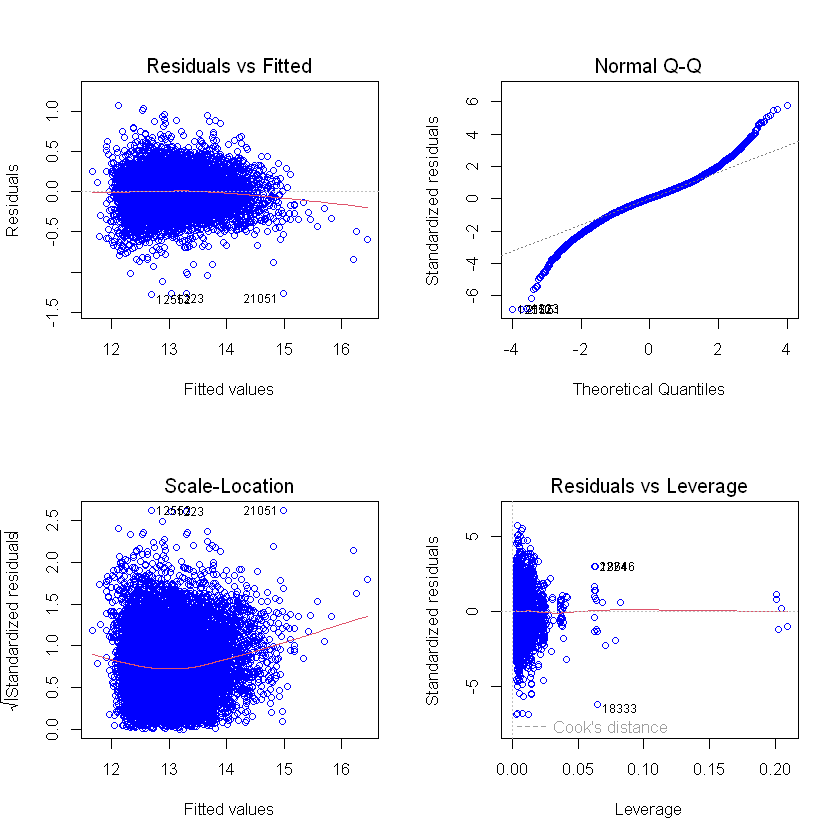

In [56]:
par(mfrow=c(2,2))
plot(model, col='blue')